In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [24]:
# Load dataset
# The dataset is for taking decision if to play tennis or not
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/id3_dataset.csv')
df.head(5)

,Outlook,Temperature,Humidity,Wind,Answer
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes


In [25]:
# Encode categorical features to numbers
feature_encoders = {}
for col in ['Outlook', 'Temperature', 'Humidity', 'Wind']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    feature_encoders[col] = le

# Encode the target variable separately
answer_le = LabelEncoder()
df['Answer'] = answer_le.fit_transform(df['Answer'])

In [26]:
# Select features and target
X = df[['Outlook', 'Temperature', 'Humidity', 'Wind']]
y = df['Answer']

In [27]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train ID3 Decision Tree (criterion='entropy')
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [28]:
# Predictions
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1 0]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



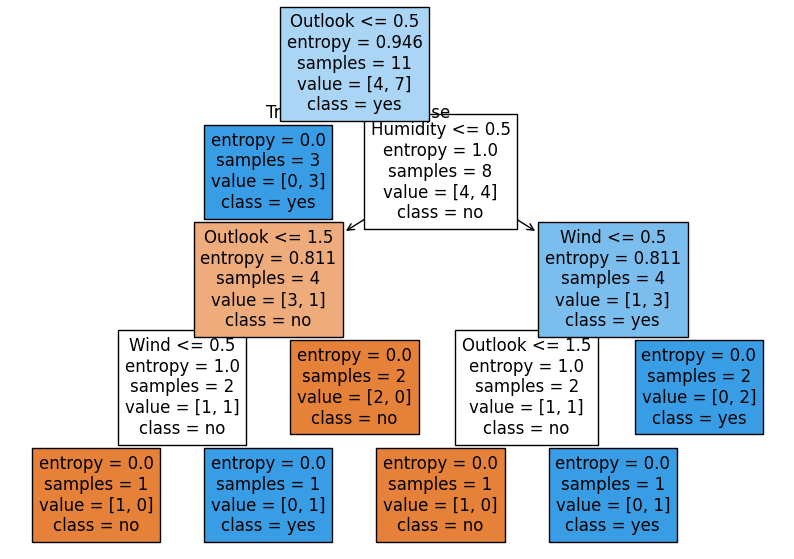

In [29]:
# Visualize the decision tree
plt.figure(figsize=(10,7))
plot_tree(clf, feature_names=['Outlook','Temperature','Humidity','Wind'], class_names=['no','yes'], filled=True)
plt.show()

In [30]:
new_input_encoded = [[2, 1, 0, 1]]  # Replace with actual encoded values

# Predict the output
predicted_class_encoded = clf.predict(new_input_encoded)

# Decode the predicted output to original string
predicted_class_label = le.inverse_transform(predicted_class_encoded)

print('Predicted output:', predicted_class_label[0])

Predicted output: strong


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [31]:
# Example new input with original categorical names
new_input_original = pd.DataFrame({
    'Outlook': ['sunny'],
    'Temperature': ['cool'],
    'Humidity': ['high'],
    'Wind': ['strong']
})

# Encode using the fitted encoders stored during training
for col in new_input_original.columns:
    new_input_original[col] = feature_encoders[col].transform(new_input_original[col])

# Now predict (input is numeric)
predicted_class_encoded = clf.predict(new_input_original)

# Decode predicted class label
predicted_class_label = answer_le.inverse_transform(predicted_class_encoded)

print('Predicted output:', predicted_class_label[0])

Predicted output: no
